In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isna().any()

Survived    False
Age          True
Fare        False
dtype: bool

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

Text(0.5, 1.0, 'Age')

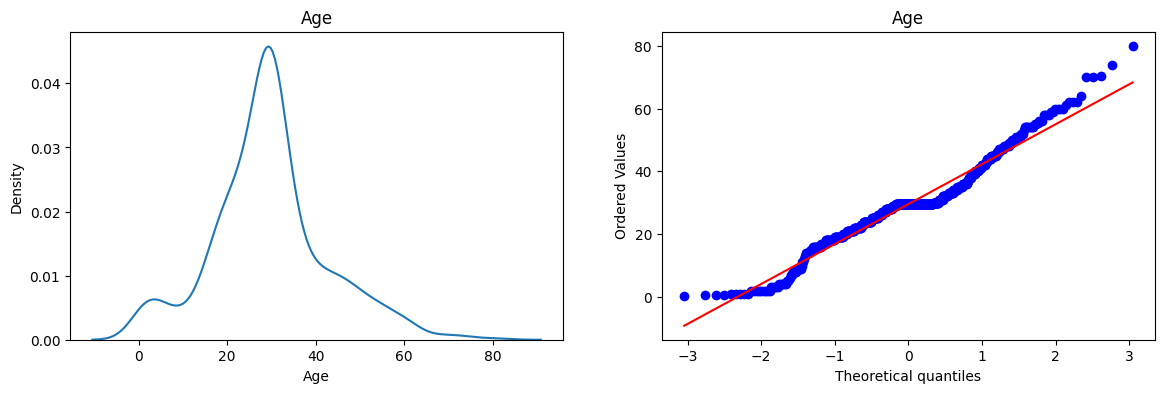

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title("Age")

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title("Age")

<ipython-input-11-bdb61885ec9e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Fare')

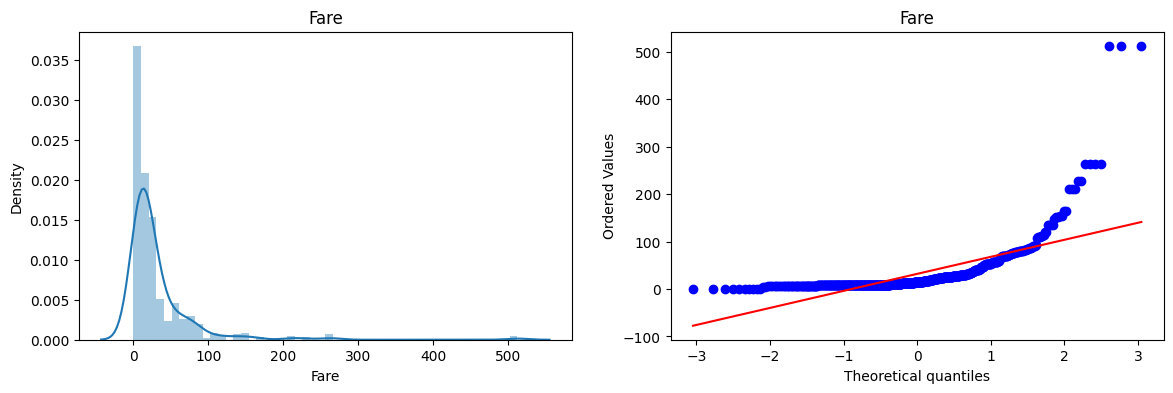

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare')

plt.subplot(122)
stats.probplot(X_train['Fare'],plot=plt,dist="norm")
plt.title("Fare")

In [ ]:
model1=DecisionTreeClassifier()
model2=LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)


y_pred=model1.predict(X_test)
y_pred2=model2.predict(X_test)


print("Accuracy_score DT",accuracy_score(y_pred,y_test))
print("Accuracy_score LR",accuracy_score(y_pred2,y_test))


Accuracy_score DT 0.6237288135593221
Accuracy_score LR 0.6576271186440678


In [ ]:
trf=FunctionTransformer(func=np.log1p)

X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.fit_transform(X_test)


model1=DecisionTreeClassifier()
model2=LogisticRegression()

model1.fit(X_train_transformed,y_train)
model2.fit(X_train_transformed,y_train)

y_pred=model1.predict(X_test_transformed)
y_pred2=model2.predict(X_test_transformed)

print("Accuracy_score DT",accuracy_score(y_pred,y_test))
print("Accuracy_score LR",accuracy_score(y_pred2,y_test))



Accuracy_score DT 0.6542372881355932
Accuracy_score LR 0.6847457627118644


In [ ]:
X_transformed=trf.fit_transform(X)

model1.fit(X_train_transformed,y_train)
model2.fit(X_train_transformed,y_train)

print("LP",np.mean(cross_val_score(model2,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(model1,X_transformed,y,scoring='accuracy',cv=10)))

LP 0.678027465667915
DT 0.6566167290886392


Text(0.5, 1.0, 'After applying transformer fare')

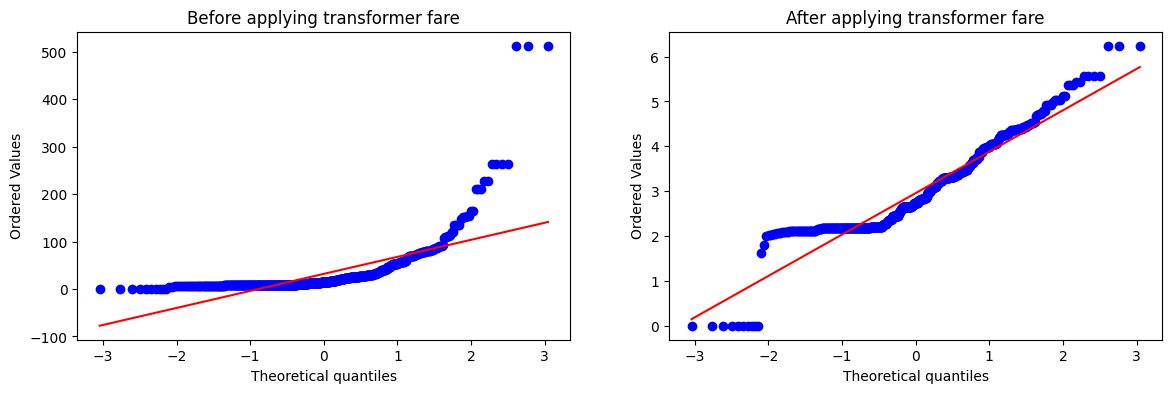

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],plot=plt,dist="norm")
plt.title("Before applying transformer fare")


plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],plot=plt,dist="norm")
plt.title("After applying transformer fare")

Text(0.5, 1.0, 'After applying transformer Age')

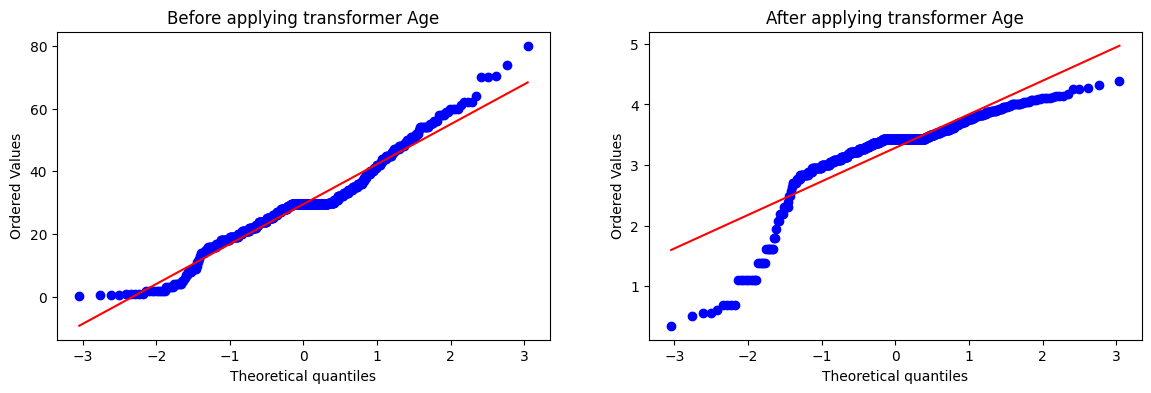

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],plot=plt,dist="norm")
plt.title("Before applying transformer Age")


plt.subplot(122)
stats.probplot(X_train_transformed['Age'],plot=plt,dist="norm")
plt.title("After applying transformer Age")

In [ ]:
trf2=ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

X_train_trf=trf2.fit_transform(X_train)
X_test_trf=trf2.transform(X_test)

model1=DecisionTreeClassifier()
model2=LogisticRegression()

model1.fit(X_train_trf,y_train)
model2.fit(X_train_trf,y_train)

y_pred=model1.predict(X_test_trf)
y_pred2=model2.predict(X_test_trf)

print("Accuracy_score DT",accuracy_score(y_pred,y_test))
print("Accuracy_score LR",accuracy_score(y_pred2,y_test))



Accuracy_score DT 0.6440677966101694
Accuracy_score LR 0.6711864406779661


In [ ]:
X_transformed2=trf2.fit_transform(X)

model1=DecisionTreeClassifier()
model2=LogisticRegression()

print("LP",np.mean(cross_val_score(model2,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(model1,X_transformed2,y,scoring='accuracy',cv=10)))

LP 0.6712609238451936
DT 0.6678152309612984


In [ ]:
def apply_transform(transform):
  X=df.iloc[:,1:3]
  y=df.iloc[:,0]

  trf=ColumnTransformer([
      ('log',FunctionTransformer(transform),['Fare'])
  ],remainder='passthrough')

  X_trans=trf.fit_transform(X)

  clf=LogisticRegression()

  print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))


  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(X['Fare'],dist='norm',plot=plt)
  plt.title("Fare")


  plt.subplot(122)
  stats.probplot(X_trans[:,0],dist='norm',plot=plt)
  plt.title("Fare after trans")

Accuracy 0.61729088639201


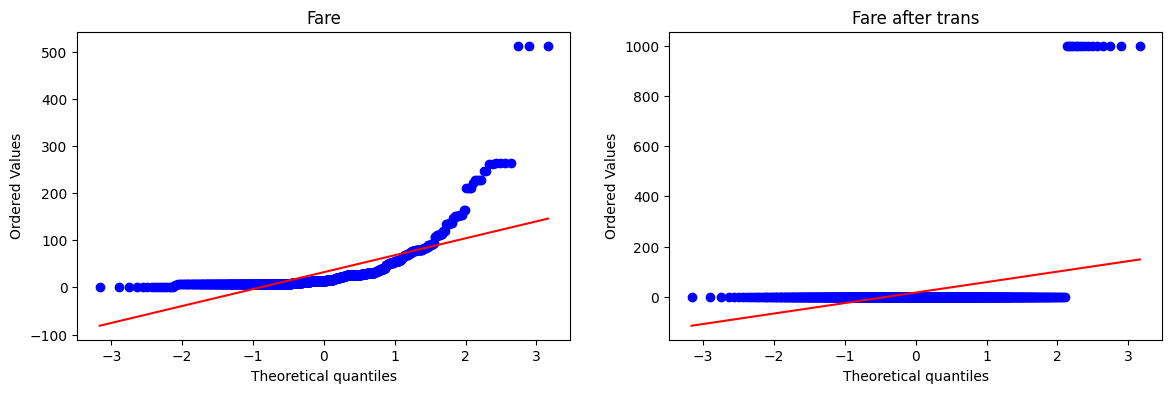

In [ ]:
apply_transform(lambda x:1/(x+0.001))